In [134]:
import pandas as pd
import numpy as np
import geopandas as gp

In [67]:
#total pickups by TOD
#choropleth of pickups shared/private by TOD

obs = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Sample.csv', index_col = 0)

In [31]:
obs.head()

,YEAR,MONTH,DOW,HOUR,ORIGIN,DESTINATION,TRAVEL_TIME_MINUTES,TRIP_LENGTH_MILES,ORIGIN_COM_AREA,DEST_COM_AREA,...,INTERNAL_SUPPPRESSED_FLAGGER,EXTERNAL_FLAGGER,INTERNAL_EXTERNAL_FLAGGER,AIRPORT_FLAGGER,TOD_1,TOD_2,TOD_3,TOD_4,TOD_5,TRIP_TYPE
77270553,2019,8,0,5,1.703106e+10,1.703116e+10,29.150000,7.7,6.0,16.0,...,0,0,0,0,1,0,0,0,0,Internal Unsuppressed
21472972,2019,10,0,5,1.703107e+10,1.703184e+10,11.666667,4.8,7.0,32.0,...,0,0,0,0,1,0,0,0,0,Internal Unsuppressed
46169129,2019,11,3,22,1.703108e+10,1.703106e+10,9.933333,4.2,8.0,6.0,...,0,0,0,0,1,0,0,0,0,Internal Unsuppressed
139246972,2019,5,0,5,1.703119e+10,1.703119e+10,18.916667,5.9,25.0,11.0,...,1,0,0,0,1,0,0,0,0,Internal Suppressed
57123553,2020,2,0,22,1.703122e+10,1.703122e+10,9.733333,2.7,48.0,69.0,...,1,0,0,0,1,0,0,0,0,Internal Suppressed


In [68]:
obs['TOD'] = np.where(obs['TOD_1'] == 1,1,np.nan)
obs['TOD'] = np.where(obs['TOD_2'] == 1,2,obs['TOD'])
obs['TOD'] = np.where(obs['TOD_3'] == 1,3,obs['TOD'])
obs['TOD'] = np.where(obs['TOD_4'] == 1,4,obs['TOD'])
obs['TOD'] = np.where(obs['TOD_5'] == 1,5,obs['TOD'])

In [69]:
obs['PRIVATE_TRIPS'] = np.where(obs['SHARED_FLAGGER'] == 1, 0,1)
obs['SHARED_TRIPS'] = np.where(obs['SHARED_FLAGGER'] == 1, 1,0)

In [70]:
obs = obs[['YEAR','MONTH','DOW','ORIGIN','DESTINATION','SHARED_TRIPS','PRIVATE_TRIPS','TOD']].groupby(by = ['YEAR','MONTH','DOW','ORIGIN','DESTINATION','TOD'], as_index = False).sum()

In [35]:
obs.head()

,YEAR,MONTH,DOW,ORIGIN,DESTINATION,TOD,SHARED_TRIPS,PRIVATE_TRIPS
0,2018,11,0,1.703101e+10,1.703101e+10,3.0,0,1
1,2018,11,0,1.703101e+10,1.703101e+10,5.0,0,1
2,2018,11,0,1.703101e+10,1.703101e+10,5.0,0,1
3,2018,11,0,1.703101e+10,1.703101e+10,3.0,1,0
4,2018,11,0,1.703101e+10,1.703101e+10,3.0,0,1


In [74]:
obs = obs[['YEAR','MONTH','ORIGIN','DESTINATION','SHARED_TRIPS','PRIVATE_TRIPS','TOD']].groupby(by = ['YEAR','MONTH','ORIGIN','DESTINATION','TOD'], as_index = False).mean()

In [75]:
len(obs)

538248

In [76]:
obs.head()

,YEAR,MONTH,ORIGIN,DESTINATION,TOD,SHARED_TRIPS,PRIVATE_TRIPS
0,2018,11,1.703101e+10,1.703101e+10,2.0,0.0,1.0
1,2018,11,1.703101e+10,1.703101e+10,3.0,0.5,0.5
2,2018,11,1.703101e+10,1.703101e+10,1.0,1.0,0.0
3,2018,11,1.703101e+10,1.703101e+10,2.0,0.0,1.0
4,2018,11,1.703101e+10,1.703101e+10,3.0,0.5,0.5


In [80]:
obs.PRIVATE_TRIPS.min()

0.0

In [78]:
obs.PRIVATE_TRIPS.max()

24.2

In [79]:
obs.PRIVATE_TRIPS.mean()

0.8445856742616832

In [81]:
obs.SHARED_TRIPS.min()

0.0

In [82]:
obs.SHARED_TRIPS.max()

4.0

In [83]:
obs.SHARED_TRIPS.mean()

0.2546628443889319

In [63]:
obs = obs[['YEAR','MONTH','DOW','ORIGIN','DESTINATION','SHARED_TRIPS','PRIVATE_TRIPS','TOD']].groupby(by = ['YEAR','MONTH','DOW','ORIGIN','TOD'], as_index = False).sum()

In [56]:
obs = obs[['YEAR','MONTH','ORIGIN','DESTINATION','SHARED_TRIPS','PRIVATE_TRIPS','TOD']].groupby(by = ['YEAR','MONTH','DESTINATION','TOD'], as_index = False).mean()

In [64]:
obs.SHARED_TRIPS.sum()

179052

In [65]:
obs.PRIVATE_TRIPS.sum()

667986

In [66]:
obs.PRIVATE_TRIPS.sum() + obs.SHARED_TRIPS.sum()

847038

In [84]:
pred = pd.read_csv('C:/Workspace/TNC-Demand-Model/Outputs/Mode_Specific_Trips.csv', index_col = 0)

C:\Users\ramu225\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [85]:
pred.head()

,MONTH,YEAR,TOD,ORIGIN,DESTINATION,TRIPS,SHARED_TRIPS,PRIVATE_TRIPS
0,11.0,2018.0,1.0,1.703101e+10,1.703184e+10,0.000012,0.000005,0.000007
1,11.0,2018.0,1.0,1.703101e+10,1.703184e+10,0.000014,0.000006,0.000008
2,11.0,2018.0,1.0,1.703101e+10,1.703184e+10,0.000012,0.000005,0.000007
3,11.0,2018.0,1.0,1.703101e+10,1.703184e+10,0.000016,0.000007,0.000010
4,11.0,2018.0,1.0,1.703101e+10,1.703184e+10,0.000041,0.000017,0.000024


In [86]:
df = pred.merge(obs, how = 'left', on = ['YEAR','MONTH','TOD','ORIGIN','DESTINATION'], suffixes = ('_PRED','_OBS'))

In [87]:
df['PRIVATE_DIFF'] = df['PRIVATE_TRIPS_PRED'] - df['PRIVATE_TRIPS_OBS']
df['SHARED_DIFF'] = df['SHARED_TRIPS_PRED'] - df['SHARED_TRIPS_OBS']

In [88]:
df['PRIVATE_DIFF'].max()

74.20747064337317

In [89]:
df['PRIVATE_DIFF'].min()

-9.592838691866872

In [90]:
df['PRIVATE_DIFF'].mean()

-0.7238286359275329

In [91]:
df['SHARED_DIFF'].max()

11.969276401856543

In [92]:
df['SHARED_DIFF'].min()

-3.9882184626652877

In [93]:
df['SHARED_DIFF'].mean()

-0.2423534876918222

In [98]:
rmse_private = np.sqrt(np.sum(np.square(df['PRIVATE_DIFF']))/len(df))

In [99]:
rmse_private

0.11293878136055326

In [97]:
df['PRIVATE_TRIPS_OBS'].mean()

0.8445856742616762

In [100]:
rmse_shared = np.sqrt(np.sum(np.square(df['SHARED_DIFF']))/len(df))

In [101]:
rmse_shared

0.050680700486254754

In [102]:
df['SHARED_TRIPS_OBS'].mean()

0.25466284438894254

In [109]:
relative_rmse_private = np.sqrt((np.sum(np.square(df['PRIVATE_DIFF']))/len(df))/np.sum(np.square(df['PRIVATE_TRIPS_OBS'])))

In [110]:
relative_rmse_private

0.00015163552983332322

In [111]:
relative_rmse_shared = np.sqrt((np.sum(np.square(df['SHARED_DIFF']))/len(df))/np.sum(np.square(df['SHARED_TRIPS_OBS'])))

In [112]:
relative_rmse_shared

0.00014034680280122468

In [117]:
nrmse_private = np.sqrt((np.sum(np.square(df['PRIVATE_DIFF']))/len(df))/df['PRIVATE_TRIPS_OBS'].mean())

In [118]:
nrmse_private

0.12289132928824985

In [121]:
nrmse_shared = np.sqrt((np.sum(np.square(df['SHARED_DIFF']))/len(df))/df['SHARED_TRIPS_OBS'].mean())

In [122]:
nrmse_shared

0.10042915674019583

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ramu225\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0, 100)

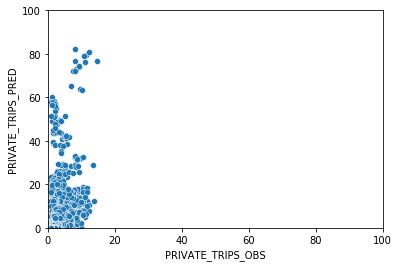

In [131]:
sns.scatterplot(df['PRIVATE_TRIPS_OBS'], df['PRIVATE_TRIPS_PRED'])
plt.xlim(0,100)
plt.ylim(0,100)

C:\Users\ramu225\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0, 15)

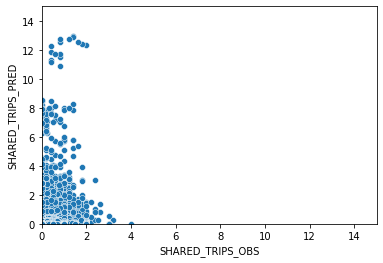

In [138]:
sns.scatterplot(df['SHARED_TRIPS_OBS'], df['SHARED_TRIPS_PRED'])

plt.xlim(0,15)
plt.ylim(0,15)

In [137]:
df2 = df.groupby(by = ['ORIGIN','MONTH','YEAR','TOD'], as_index = False).sum()

C:\Users\ramu225\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0, 100)

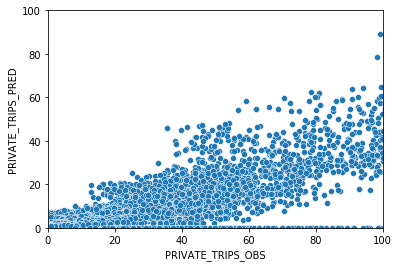

In [139]:
sns.scatterplot(df2['PRIVATE_TRIPS_OBS'], df2['PRIVATE_TRIPS_PRED'])
plt.xlim(0,100)
plt.ylim(0,100)

In [ ]:

# Add the color for the chloropleth:
m = folium.Map([41.8781, -87.6298], zoom_start=11)
m.choropleth(
 geo_data=tracts,
 name= var,
 data=df,
 columns = ['GEOID10_STR', var],
 key_on='feature.properties.geoid10',
 fill_color='BuGn',
 fill_opacity=0.6,
 line_opacity=0.2,
 #bins = bins,
 legend_name= ' Totals',
 highlight = True
)

feature_group = folium.FeatureGroup(name='Census Tract Centroids', show = False)

for tract2 in centroids.GEOID:
    row = centroids[centroids['GEOID'] == tract2]
    folium.CircleMarker([row['Y'], row['X']], popup = str(int(row['GEOID'].values[0])), radius = 1, fill = True, fill_color = 'grey', color = 'grey').add_to(feature_group)

m.add_child(feature_group)

folium.LayerControl().add_to(m)

m.save('C:/Workspace/TNC-Demand-Model/Data Exploration/Destination Choice Model Visualizations/'+ var + '_Map.html')
